# What is LIBOR?

Libor is short for London interbank offered rates. It is an unsecured short-term borrowing rate between banks. It is a reference (benchmark) rate that is regulated and administered in the UK but used globally. 

Libor emerged in the late 1960s to support the burgeoning syndicated loan market. In 1986, the British Bankers’ Association (BBA) assumed control of the rate, taking responsibility for its publication until January 2014. The BBA collected interbank offered rate quotes from a panel of banks (18 global banks), reflecting the rates at which banks said they could borrow funds from other banks, just prior to 11:00 AM local time. The top and bottom four responses were discarded in computing Libor as an interquartile trimmed mean of the submissions. The banks submitting quotes typically have a AA credit rating. Libor therefore is considered to be an estimate of the unsecured borrowing rate for AA-rated banks. 

At its highest, BBA is computing LIBOR for 10 currencies, by October 2013, it only accounted for 5: the US dollar, euro, sterling, yen and Swiss franc. 

Due to cases of Libor misconduct, in June 2012, Martin Wheatley then the CEO-designated of the Financial Conduct Authority (FCA) was commissioned to review into the setting and usage of Libor. In September 2012, the findings and plan for Libor reform were published. In April 2013, the FCA was responsible for regulating Libor and a new private organizations: the Intercontinental Exchange (ICE) Benchmark Administration Limited (IBA) began to administer intercontinental exchange Libor starting February 2014. 

Libor has a host of cousins across currency areas: EURIBOR, HIBOR, MIBOR, SIBOR, BBSW, TIBOR and CDOR etc. 


# What is SOFR? Is it a risk-free rate? Why is SOFR introduced now? 

Some select overnight reference rates are:

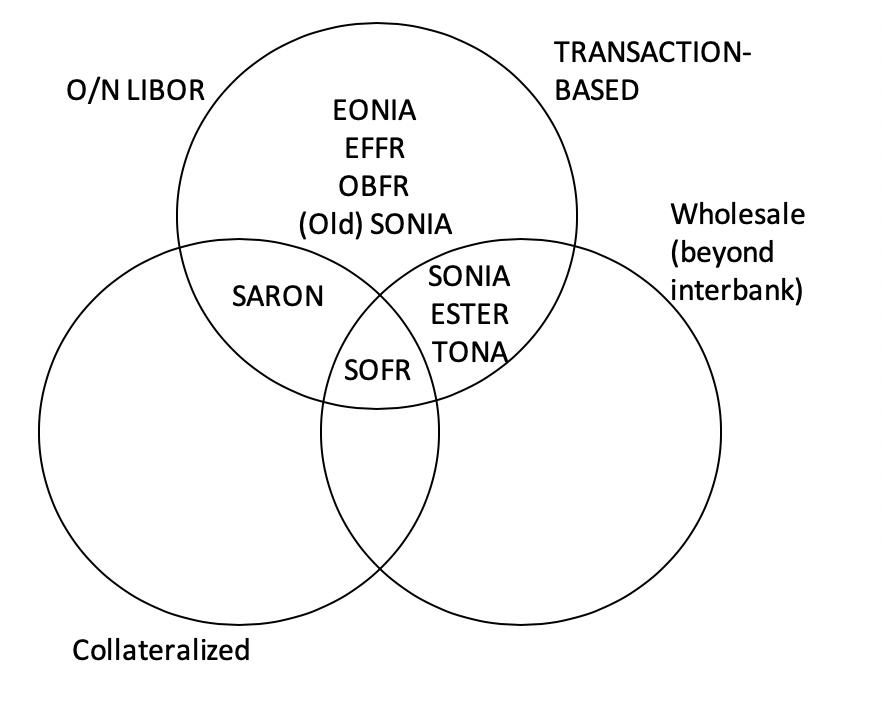

In [1]:
from IPython.display import Image
Image("risk_free_rates.png")

Introduced in 2014 by the Alternative Reference Rates Committee (ARRC), SOFR is the Secured Overnight Financing Rate based on overnight transactions in the US dollar Treasury repo market, the largest rates market at a given maturity in the world. It is a rate produced by Federal Reserve Bank of New York. It is a broad measure of the cost of borrowing cash overnight collateralized by Treasury securities. It includes all trades in the Broad General Collateral Rate plus bilateral Treasury repo transactions cleared through the Delivery-versus-Payment (DVP) services offered by the Fixed Income Clearing Corporation (FICC).
It is calculated as a volume-weighted median of transaction-level tri-party repo data collected from the Bank of New York Mellon as well as GCF repo transaction data and data on bilateral Treasury repo transactions cleared through FICC’s DVP service.
It is now introduced as a new alternative of RFR because of the need to strengthen market integrity following cases of misconduct involving banks' LIBOR submissions. To protect them against manipulation, the new benchmark risks are grounded in actual transations and liquid markets rather than be derived from a poll of selected banks.

# What are the major impediments to building volume in SOFR-Linked contracts? 

Although users of derivatives market are accustomed to using term rates based on compounded O/N rates, and therefore should find transitioning to SOFR less difficult. Participants in cash markets have been accustomed to using interest rates set for the entire term at the beginning of the period, fining the associated certainty useful for budgeting, cash flow and risk management purposes. 

IBOR-linked business is still dominant in many market segments. Issurance of securities linked to LIBOR is still considerably greater than that linked to SOFR. 

LIBOR is deeply rooted in firm's systems, processes and models. Transition touches almost every part of a financial services group, banking, capital markets, insurance and asset management. 

# What measures should the official sector consider to encourage adoption of the SOFR?

There are many risks in terms of the transition:
1. Insufficient industry action
2. Information asymmetries
3. Operational issues and existing regulartory rules
4. Insufficient SOFR liquidity makes it difficult to build a curve and price products
5. Amendments to exisiting contracts may result in potential tax issues
etc. 

# Comparing SOFR and LIBOR 

In [2]:
import numpy as np
import os

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings 
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [3]:
import pandas as pd

sofr = pd.read_csv("SOFR.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


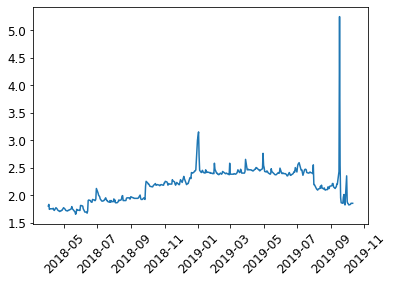

In [4]:
sofr['DATE'] = pd.to_datetime(sofr['DATE'], format='%Y-%m-%d')

plt.plot(sofr['DATE'], sofr['RATE'], '-')
_ = plt.xticks(rotation=45)

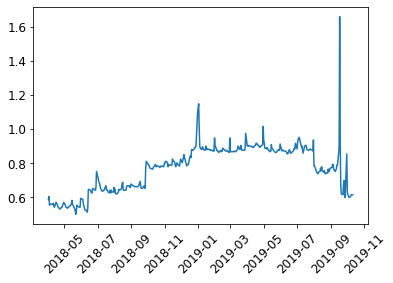

In [5]:
import math
log_rate=[math.log(x) for x in sofr['RATE']]

plt.plot(sofr['DATE'], log_rate, '-')
_ = plt.xticks(rotation=45)

## SOFR LIBOR Spreads


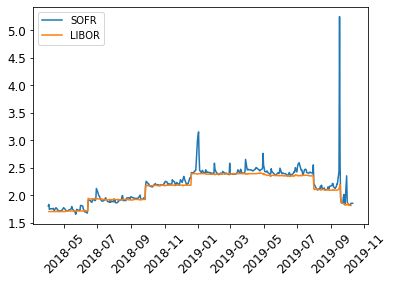

In [6]:
import pandas as pd

libor = pd.read_csv("LIBOR.csv")

libor['DATE'] = pd.to_datetime(libor['DATE'], format='%Y-%m-%d')

plt.plot(sofr['DATE'], sofr['RATE'], '-',label='SOFR')
_ = plt.xticks(rotation=45)
plt.plot(libor['DATE'], libor['RATE'], '-',label='LIBOR')
_ = plt.xticks(rotation=45)
plt.legend(loc='best')

In [7]:
sofr_df=pd.DataFrame.from_records(sofr)
libor = libor.set_index('DATE')
reversed_df = sofr_df.iloc[::-1]
reversed_df = reversed_df.set_index('DATE')

In [8]:
df = pd.concat([reversed_df, libor], axis=1, join='inner')
df.columns = ['sofr','libor']

In [9]:
df.head()

,sofr,libor
DATE,,
2018-04-03,1.83,1.7
2018-04-04,1.74,1.7
2018-04-05,1.75,1.7
2018-04-06,1.75,1.7
2018-04-09,1.75,1.7


In [10]:
df['sofr_dif'] = df['sofr']-df['libor']
df['log_sofr'] = [np.log(x) for x in df['sofr']]
df['log_libor'] = [np.log(x) for x in df['libor']]
df['log_dif'] = df['log_sofr']-df['log_libor']

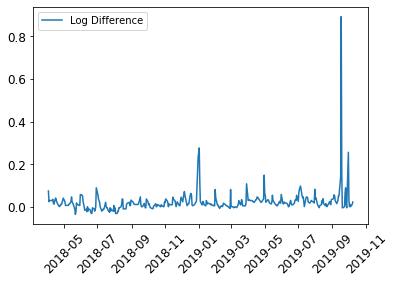

In [11]:
plt.plot(df['log_dif'], label = 'Log Difference')
_ = plt.xticks(rotation=45)
plt.legend()

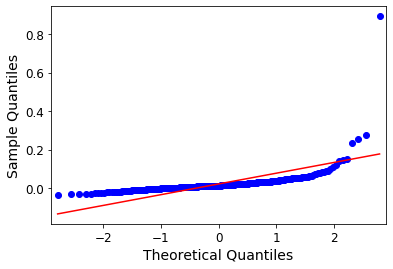

In [12]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df['log_dif'], line='s')
plt.show()

### Checking for normality 

In [13]:
from scipy.stats import anderson 

result = anderson(df['log_dif'])

print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 47.670
15.000: 0.570, data does not look normal (reject H0)
10.000: 0.649, data does not look normal (reject H0)
5.000: 0.779, data does not look normal (reject H0)
2.500: 0.908, data does not look normal (reject H0)
1.000: 1.081, data does not look normal (reject H0)


### Augmented Dickey-Fuller unit root test 

In [14]:
import statsmodels
from statsmodels import tsa
from statsmodels.tsa import stattools
x=df['log_dif']

statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

(-4.349747546896313,
 0.00036388891216308306,
 9,
 365,
 {'1%': -3.4483935212959844,
  '5%': -2.8694912343676497,
  '10%': -2.571005879151811},
 -1087.1634738824182)

ADF value = -4.35, pValue = 0.00036, the test is passed on 1% level, it is a continuous mean-reverting time-series

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


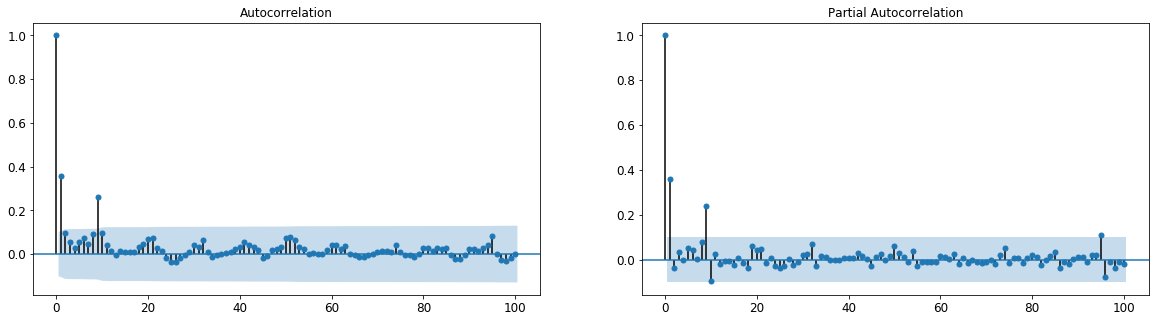

In [15]:
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
data=df['log_dif']
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
sm.graphics.tsa.plot_acf(df['log_dif'], lags=100, ax=axes[0])
sm.graphics.tsa.plot_pacf(df['log_dif'], lags=100, ax=axes[1])
plt.show()

In [16]:
from statsmodels.tsa.arima_model import ARIMA
data=df['log_dif']
train = data[:-10]
test = data[-10:]
model1 = ARIMA(data, order=(2,0,1)).fit()  # ARIMA = (2,0,1)
delta1 = model1.fittedvalues - train
score1 = 1 - delta1.var()/train[1:].var()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


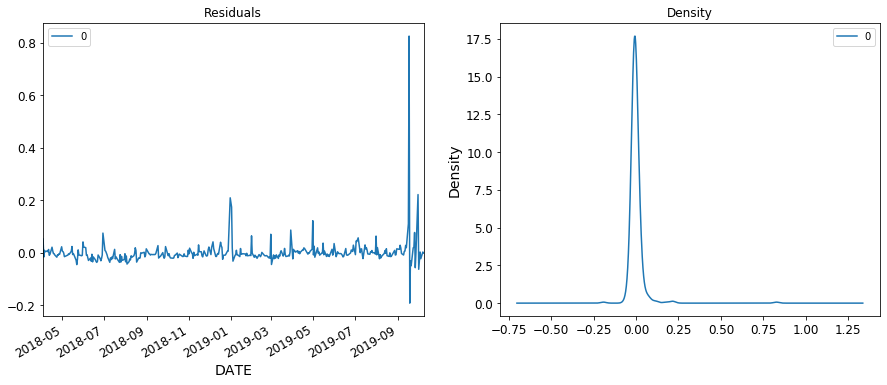

In [17]:
residuals = pd.DataFrame(model1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0], figsize=(15,6))
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

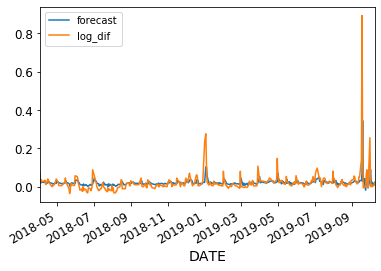

In [18]:
# Actual vs Fitted
model1.plot_predict(dynamic=False)
plt.show()

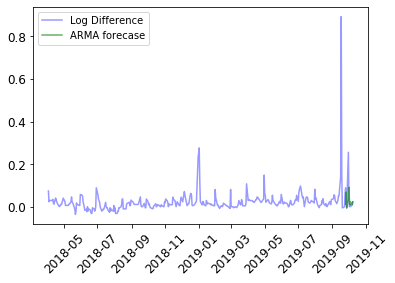

In [19]:
from pandas import datetime
start_index = datetime(2019,9,25)
end_index = datetime(2019,10,8)
arma_forecast = model1.predict(start=start_index, end=end_index)
future_forecast = pd.DataFrame(arma_forecast,index = test.index,columns=['Prediction'])
plt.plot(df['log_dif'], color = 'blue', alpha=0.4,label = 'Log Difference')
plt.plot(arma_forecast, color ='green', alpha=0.6, label='ARMA forecase')
_ = plt.xticks(rotation=45)
plt.legend()
plt.show()

In [20]:
df['dod_change']=pd.DataFrame.pct_change(df['sofr'], periods=1, fill_method='pad', limit=None, freq=None)
df['dod_ratio'] = df['dod_change']+1
df['log_ratio'] = np.log(df['dod_ratio'])
df['dod_ratio'][0]=1
df['log_ratio'][0]=0
df.head()

,sofr,libor,sofr_dif,log_sofr,log_libor,log_dif,dod_change,dod_ratio,log_ratio
DATE,,,,,,,,,
2018-04-03,1.83,1.7,0.13,0.604316,0.530628,0.073688,NaN,1.000000,0.000000
2018-04-04,1.74,1.7,0.04,0.553885,0.530628,0.023257,-0.049180,0.950820,-0.050431
2018-04-05,1.75,1.7,0.05,0.559616,0.530628,0.028988,0.005747,1.005747,0.005731
2018-04-06,1.75,1.7,0.05,0.559616,0.530628,0.028988,0.000000,1.000000,0.000000
2018-04-09,1.75,1.7,0.05,0.559616,0.530628,0.028988,0.000000,1.000000,0.000000


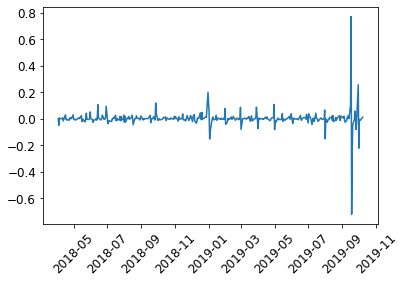

In [21]:
import seaborn as sns
sns.lineplot(data=df['log_ratio'])
_ = plt.xticks(rotation=45)

In [22]:
df['squared_dif'] = df['log_ratio']**2
df.head()

,sofr,libor,sofr_dif,log_sofr,log_libor,log_dif,dod_change,dod_ratio,log_ratio,squared_dif
DATE,,,,,,,,,,
2018-04-03,1.83,1.7,0.13,0.604316,0.530628,0.073688,NaN,1.000000,0.000000,0.000000
2018-04-04,1.74,1.7,0.04,0.553885,0.530628,0.023257,-0.049180,0.950820,-0.050431,0.002543
2018-04-05,1.75,1.7,0.05,0.559616,0.530628,0.028988,0.005747,1.005747,0.005731,0.000033
2018-04-06,1.75,1.7,0.05,0.559616,0.530628,0.028988,0.000000,1.000000,0.000000,0.000000
2018-04-09,1.75,1.7,0.05,0.559616,0.530628,0.028988,0.000000,1.000000,0.000000,0.000000


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


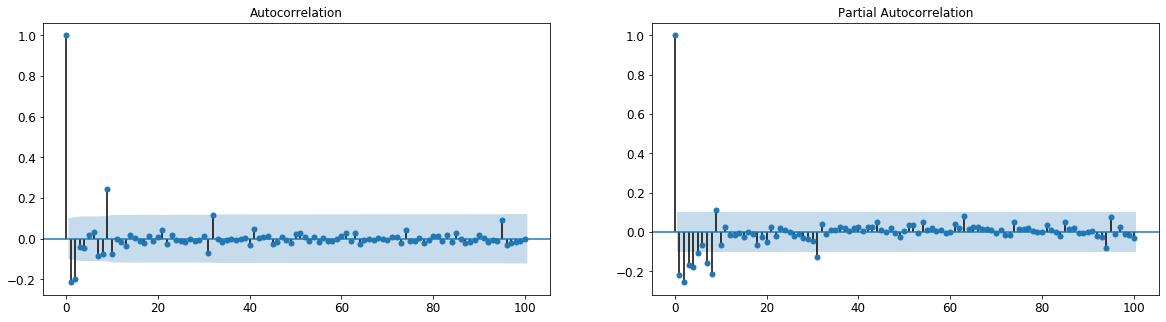

In [23]:
import statsmodels.api as sm
data=df['log_ratio']
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
sm.graphics.tsa.plot_acf(df['log_ratio'], lags=100, ax=axes[0])
sm.graphics.tsa.plot_pacf(df['log_ratio'], lags=100, ax=axes[1])
plt.show()

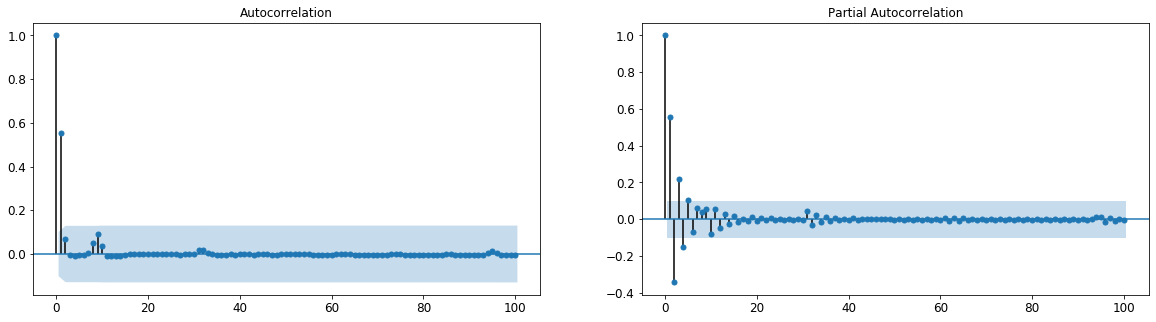

In [24]:
import statsmodels.api as sm
data=df['squared_dif']
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
sm.graphics.tsa.plot_acf(df['squared_dif'], lags=100, ax=axes[0])
sm.graphics.tsa.plot_pacf(df['squared_dif'], lags=100, ax=axes[1])
plt.show()

In [25]:
import statsmodels
from statsmodels import tsa
x=df['log_ratio']
statsmodels.stats.diagnostic.acorr_ljungbox(x, lags=None, boxpierce=False)

(array([17.45963158, 32.08448683, 32.6537014 , 33.40514089, 33.55335442,
        33.9489147 , 36.80663137, 39.11406555, 62.55619178, 64.88031725,
        64.88045463, 64.9621269 , 65.43630105, 65.58199975, 65.58482657,
        65.65010554, 65.79186565, 65.85509376, 65.88873658, 65.92242984,
        66.58799296, 66.90412342, 67.01681137, 67.02671657, 67.08025749,
        67.20042115, 67.20082395, 67.25036407, 67.2625389 , 67.35244816,
        69.45133862, 75.00902098, 75.00917634, 75.11940978, 75.13179446,
        75.13211769, 75.15232193, 75.15319275, 75.15878998, 75.52572833]),
 array([2.93473605e-05, 1.07880316e-07, 3.81049910e-07, 9.86738682e-07,
        2.92164577e-06, 6.88193506e-06, 5.10327186e-06, 4.68155440e-06,
        4.30037225e-10, 4.27267348e-10, 1.13487961e-09, 2.77057929e-09,
        5.49252691e-09, 1.20415584e-08, 2.69799782e-08, 5.69221226e-08,
        1.12887065e-07, 2.24143202e-07, 4.37528611e-07, 8.31339857e-07,
        1.22494881e-06, 2.01196876e-06, 3.48091359e-06

For all p-value up to lags=40, the p-value stat is less than 1%, which strongly rejected the temporal independence of the SOFR rate and difference in the lags. 

# GARCH modeling

## GARCH(1,1)

We are going to construct the GARCH(1,1) model based on the following defnition:

$\Delta log(r_t) = \mu \cdot \Delta t + \sigma_t \cdot \Delta W_t$

$\sigma_t^2 = \omega + \alpha \cdot \sigma^2_{t-1} + \beta \cdot \epsilon^2_{t-1}$

$\epsilon_t = \sigma_t \cdot \Delta W_t$

where $\Delta log(r_t)$ is equal to $log(r_t)- log(r{t-1})$ and is equal to $log (\frac{r_t}{r_{t-1}})$; $\sigma_t$ is the time-dependent volatility, $\omega$ is the intercept, $\epsilon_t$ is the random error term, and $W_t$ is a standard Brownian motion. 

In [26]:
n_test = 20
data = df['log_ratio']
train, test = data[:-n_test], data[-n_test:]

In [27]:
from arch import arch_model

model = arch_model(train, p=1, q=1)

In [28]:
model_fit = model.fit()
forecast = model_fit.forecast(horizon=n_test)
print(model_fit.summary)

Iteration:      1,   Func. Count:      6,   Neg. LLF: -803.9183695470259
Iteration:      2,   Func. Count:     18,   Neg. LLF: -804.003943195963
Iteration:      3,   Func. Count:     26,   Neg. LLF: -804.2095329620992
Iteration:      4,   Func. Count:     38,   Neg. LLF: -804.209796139808
Iteration:      5,   Func. Count:     47,   Neg. LLF: -804.2704936453845
Iteration:      6,   Func. Count:     54,   Neg. LLF: -804.7217150267841
Iteration:      7,   Func. Count:     62,   Neg. LLF: -804.8215702847033
Iteration:      8,   Func. Count:     69,   Neg. LLF: -806.7426830560446
Iteration:      9,   Func. Count:     76,   Neg. LLF: -806.8096349577961
Iteration:     10,   Func. Count:     83,   Neg. LLF: -806.9108818261861
Iteration:     11,   Func. Count:     89,   Neg. LLF: -806.9173796280145
Iteration:     12,   Func. Count:     95,   Neg. LLF: -806.9185596287042
Iteration:     13,   Func. Count:    101,   Neg. LLF: -806.9185669474607
Optimization terminated successfully.    (Exit mode 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0007363. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)


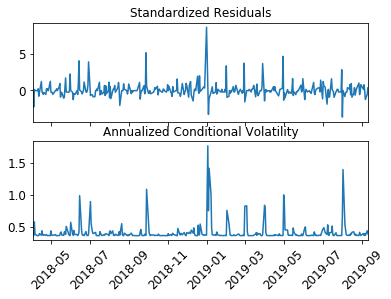

In [29]:
fig = model_fit.plot(annualize='D')
_ = plt.xticks(rotation=45)

In [30]:
print(forecast.mean.iloc[-3:])
print(forecast.residual_variance.iloc[-3:])
print(forecast.variance.iloc[-3:])

                h.01      h.02      h.03      h.04      h.05      h.06  \
DATE                                                                     
2019-09-06       NaN       NaN       NaN       NaN       NaN       NaN   
2019-09-09       NaN       NaN       NaN       NaN       NaN       NaN   
2019-09-10  0.000702  0.000702  0.000702  0.000702  0.000702  0.000702   

                h.07      h.08      h.09      h.10      h.11      h.12  \
DATE                                                                     
2019-09-06       NaN       NaN       NaN       NaN       NaN       NaN   
2019-09-09       NaN       NaN       NaN       NaN       NaN       NaN   
2019-09-10  0.000702  0.000702  0.000702  0.000702  0.000702  0.000702   

                h.13      h.14      h.15      h.16      h.17      h.18  \
DATE                                                                     
2019-09-06       NaN       NaN       NaN       NaN       NaN       NaN   
2019-09-09       NaN       NaN      

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


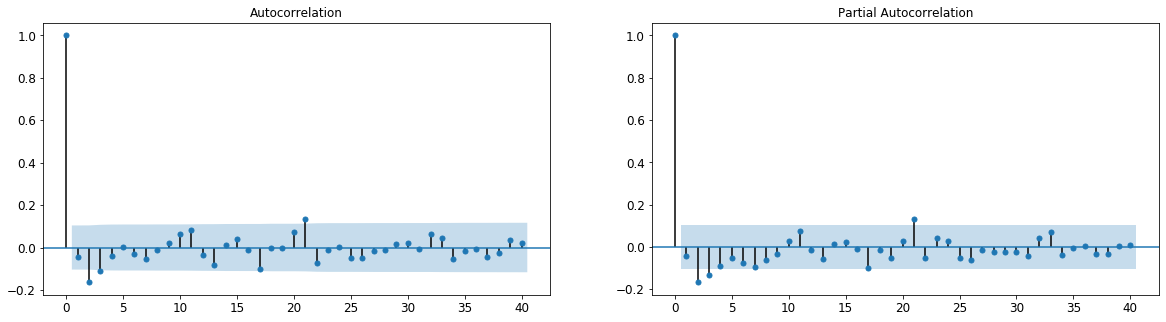

In [31]:
resid = model_fit.resid
import statsmodels.api as sm
lag_acf = acf(resid, nlags=20)
lag_pacf = pacf(resid, nlags=20, method='ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(resid, lags=40, ax=axes[1])
plt.show()

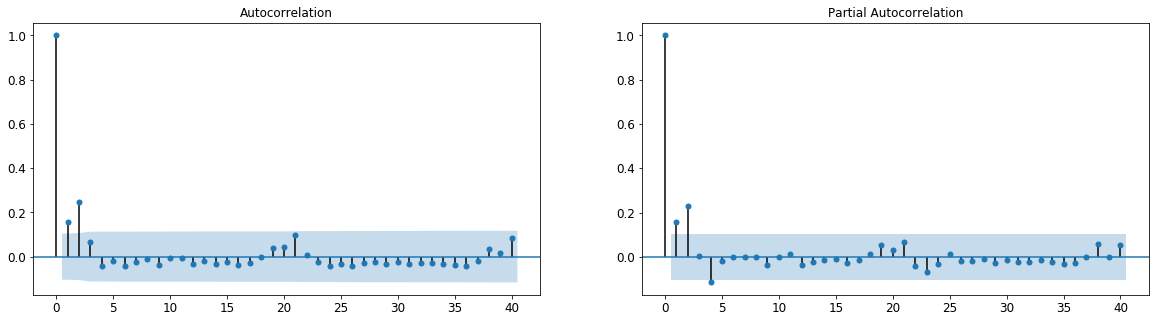

In [32]:
res_sq = [x**2 for x in resid]
lag_acf = acf(res_sq, nlags=20)
lag_pacf = pacf(res_sq, nlags=20, method='ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
sm.graphics.tsa.plot_acf(res_sq, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(res_sq, lags=40, ax=axes[1])
plt.show()

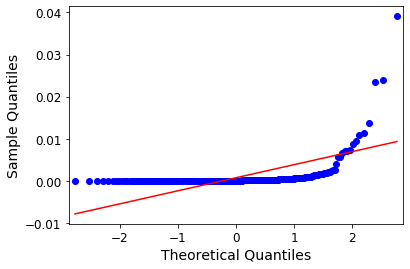

In [33]:
from statsmodels.graphics.gofplots import qqplot
std_res = np.array(res_sq)
qqplot(std_res, line='s')
plt.show()

## GJR-GARCH(1,1) 

$\sigma_t^2 - k+\delta \cdot \sigma_{t-1}^2 +\alpha\cdot \epsilon_{t-1}^2 \cdot I_{t-1}$

where $\epsilon_t = \sigma_t \cdot z_t$ with $z_t$ iid and $I_{t-1}$ is an indicator function which is equal to 0 if $\epsilon_{t-1}\geq 0$ and to 1 otherwise.

In [34]:
am = arch_model(data, p=1, o=1, q=1)
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              log_ratio   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                  GJR-GARCH   Log-Likelihood:                704.227
Distribution:                  Normal   AIC:                          -1398.45
Method:            Maximum Likelihood   BIC:                          -1378.82
                                        No. Observations:                  375
Date:                Sat, Nov 02 2019   Df Residuals:                      370
Time:                        22:51:07   Df Model:                            5
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -2.3697e-03  1.059e-03     -2.238  2.5

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004234. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


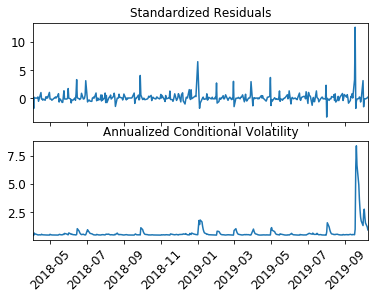

In [35]:
fig = res.plot(annualize='D')
_ = plt.xticks(rotation=45)

### ACF and PACF of residuals, squared residuals 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


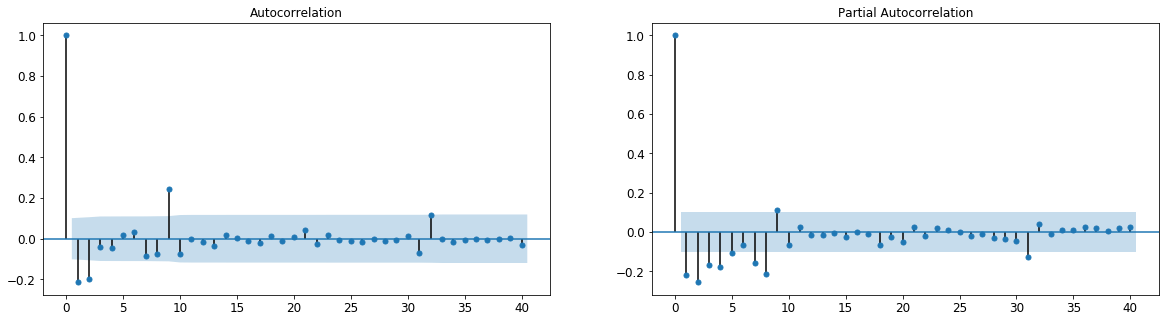

In [36]:
resid = res.resid
import statsmodels.api as sm
lag_acf = acf(resid, nlags=20)
lag_pacf = pacf(resid, nlags=20, method='ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(resid, lags=40, ax=axes[1])
plt.show()

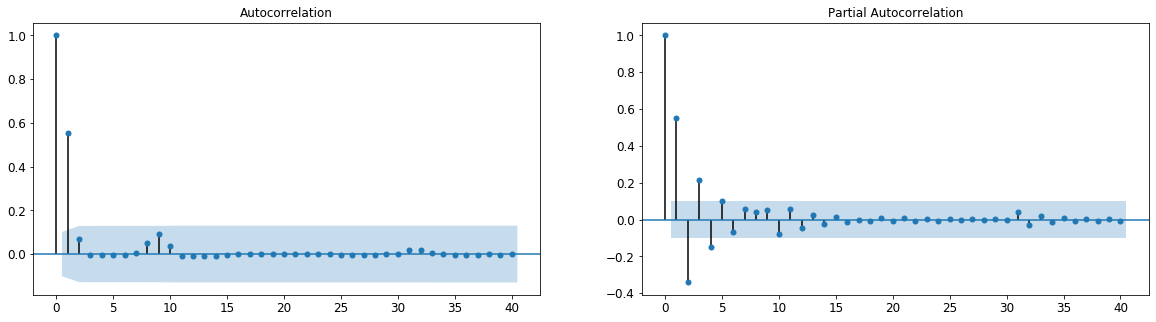

In [37]:
res_sq = [x**2 for x in resid]
lag_acf = acf(res_sq, nlags=20)
lag_pacf = pacf(res_sq, nlags=20, method='ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
sm.graphics.tsa.plot_acf(res_sq, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(res_sq, lags=40, ax=axes[1])
plt.show()

## GARCH (1,1) with student-t innovations 

In [38]:
am = arch_model(data, p=1, o=1, q=1, power=1.0, dist='StudentsT')
res = am.fit(update_freq=5, disp='off')
print(res.summary())

                     Constant Mean - TARCH/ZARCH Model Results                      
Dep. Variable:                    log_ratio   R-squared:                     -13.500
Mean Model:                   Constant Mean   Adj. R-squared:                -13.500
Vol Model:                      TARCH/ZARCH   Log-Likelihood:               -51.3255
Distribution:      Standardized Student's t   AIC:                           114.651
Method:                  Maximum Likelihood   BIC:                           138.212
                                              No. Observations:                  375
Date:                      Sat, Nov 02 2019   Df Residuals:                      369
Time:                              22:51:09   Df Model:                            6
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arch/univariate/base.py:260: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.004234. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  DataScaleWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/arch/univariate/base.py:605: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


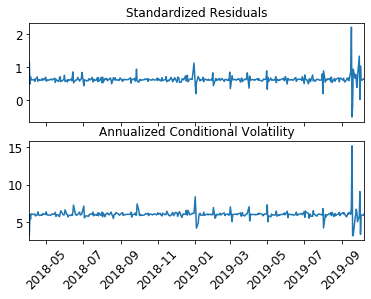

In [39]:
fig = res.plot(annualize='D')
_ = plt.xticks(rotation=45)

### GARCH with student-t error: ACF and PACF for residuals and squared residuals 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


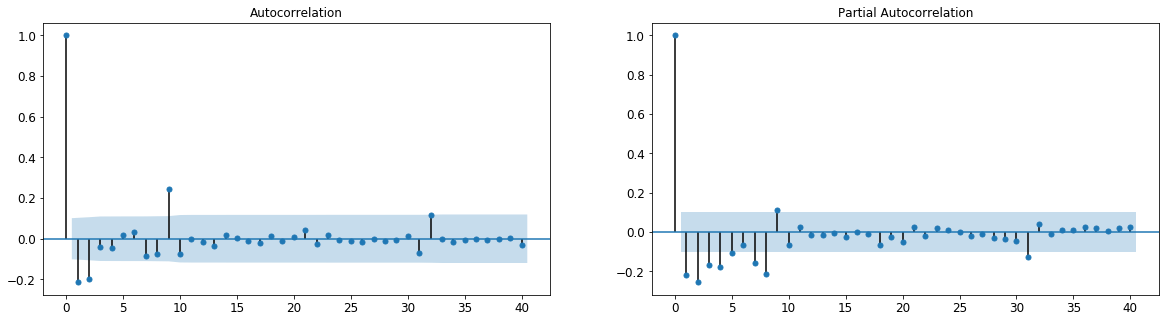

In [40]:
resid = res.resid
import statsmodels.api as sm
lag_acf = acf(resid, nlags=20)
lag_pacf = pacf(resid, nlags=20, method='ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
sm.graphics.tsa.plot_acf(resid, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(resid, lags=40, ax=axes[1])
plt.show()

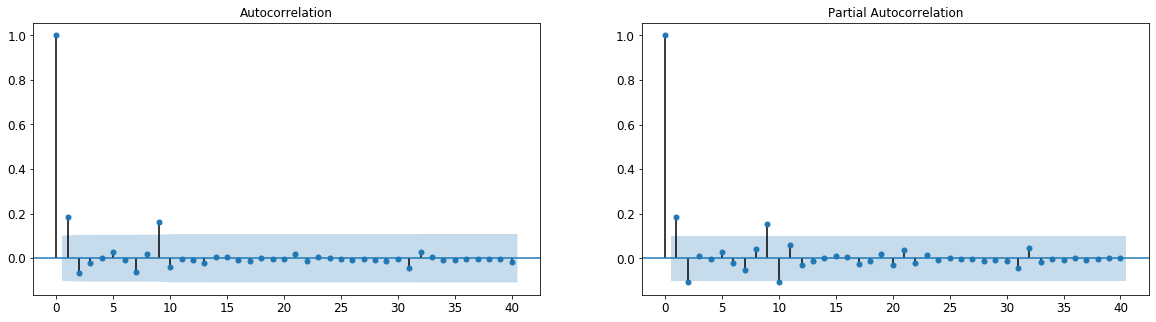

In [41]:
res_sq = [x**2 for x in resid]
lag_acf = acf(res_sq, nlags=20)
lag_pacf = pacf(res_sq, nlags=20, method='ols')

fig, axes = plt.subplots(1,2, figsize=(20,5))
sm.graphics.tsa.plot_acf(res_sq, lags=40, ax=axes[0])
sm.graphics.tsa.plot_pacf(res_sq, lags=40, ax=axes[1])
plt.show()

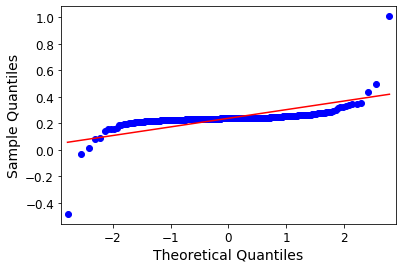

In [42]:
from statsmodels.graphics.gofplots import qqplot
t_resid = np.array(resid)
qqplot(t_resid, line='s')
plt.show()

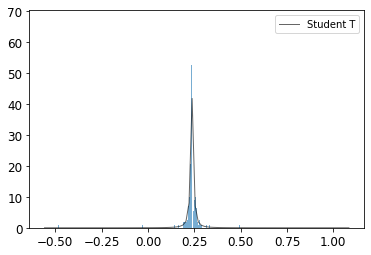

In [43]:
from scipy.stats import t 
t_resid = np.array(resid)
plt.hist(t_resid, bins=500, density=True, alpha=0.6)
param = t.fit(t_resid)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = t.pdf(x, df=param[0],loc=param[1],scale=param[2])
plt.plot(x, p, 'k', linewidth=1, alpha=0.6, label='Student T')
plt.legend()
plt.show()

# Jump Detection 

Consider the model where we define a new process $r^*_t$, to which an independent jump component $\alpha_t I_t$ is added. 

$r_t^* = \frac{\Delta log(r_{t_i})}{r_{t_i}}=r_t + \alpha_t I_t$

where $I_t$ is generated by some jump process such as a Poisson process and $\alpha_t$ is the jump size. An assumption behind this process is that the jump $\alpha_t I_t$ will not affect the conditional variance in the next period, $\sigma_{t+1}^2$. 

Denote 

$\tilde{J}_t = \frac{r_t^* - \tilde{\mu}_t}{\tilde{\sigma}_t}$

where $\tilde{\mu}_t$ and $\tilde{\sigma}_t$ are estimated parameters of the model in the standard GARCH(1,1). If $\alpha_t I_t =0$ on day t, $\tilde{J}_t$ follows a normal distribution and this standardized returns from the process $\tilde{J}_t$ that are too large must actually reflect jumps. This suggest the following detection rule:

$\tilde{I}_t = I(|\tilde{J}_t|>k)$

where $k$ is a suitable critical value. This leads to the following filtered log difference $\tilde{r}_t$ which should be conditionally Gaussian. The rule implies that $\tilde{I}_t =1$ when a jump is detected at time $t$ and 0 otherwise. 

In [44]:
signal = [False]*len(data)
for i in range(len(data)):
    if abs(data[i])>np.log(1.02):
        signal[i] = True

In [45]:
jumps = np.array(signal)
df['jumps'] = jumps
df.head()

,sofr,libor,sofr_dif,log_sofr,log_libor,log_dif,dod_change,dod_ratio,log_ratio,squared_dif,jumps
DATE,,,,,,,,,,,
2018-04-03,1.83,1.7,0.13,0.604316,0.530628,0.073688,NaN,1.000000,0.000000,0.000000,False
2018-04-04,1.74,1.7,0.04,0.553885,0.530628,0.023257,-0.049180,0.950820,-0.050431,0.002543,True
2018-04-05,1.75,1.7,0.05,0.559616,0.530628,0.028988,0.005747,1.005747,0.005731,0.000033,False
2018-04-06,1.75,1.7,0.05,0.559616,0.530628,0.028988,0.000000,1.000000,0.000000,0.000000,False
2018-04-09,1.75,1.7,0.05,0.559616,0.530628,0.028988,0.000000,1.000000,0.000000,0.000000,False


In [46]:
time = []
for idx, row in df.iterrows():
    if row['jumps']:
        time.append(idx)
signal = pd.to_datetime(time)

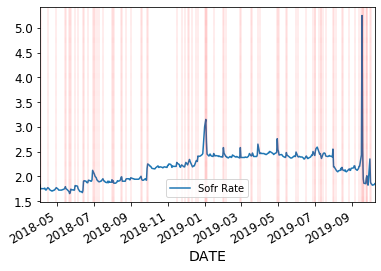

In [47]:
ax = df['sofr'].plot(label='Sofr Rate')
xposition = signal
for xc in xposition:
    ax.axvline(x=xc, color='r', linestyle='--', linewidth=0.2)
plt.legend()

## GARCH (1,1) process with jumps 

$\Delta log(r_t) = \mu \cdot \Delta t + \sigma_t \cdot \Delta W_t + \sum_{i=1}^{n_t} log(Y_i)$

where 

$log(Y_i) = N(\theta, \delta^2)$

and 

$\mathbb{P} (n_t = j|I_{t-1}) = \frac{exp(-\lambda)\lambda^j}{j!}$

#### Still in progress 